# Synthesis extraction info

In [15]:
import sys
from pyprojroot import here
# Add the root of the project (where `src/` lives) to sys.path
sys.path.append(str(here()))
import json
import os

from src.utils.optimize_extraction_schema import optimize_synthesis_info_schema

import dotenv
# Load environment variables from .env file
dotenv.load_dotenv()

# Set the API keys
azure_openai_api_key = os.getenv("AZURE_OPENAI_API_KEY")
print(f"AZURE_OPENAI_API_KEY: {azure_openai_api_key[:4]}...")
if not azure_openai_api_key:
    raise ValueError("AZURE_OPENAI_API_KEY environment variable not set.")

azure_deployment = os.getenv("AZURE_MODEL_DEPLOYMENT_NAME")
azue_api_version=os.getenv("AZURE_OPENAI_API_VERSION")
azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT")

current_schema = {
    "material": "<exact formula or name as presented in the paper>",
    "synthesis_steps": [
        {
            "step": 1,
            "label": "<Short title of the step, e.g., 'Precursor Mixing'>",
            "details": {
                "reagents": ["<chemical names>"],
                "temperature": "<value or null>",
                "duration": "<value or null>"
            }
        }
    ]
}


from src.utils.pymupdf_loader import PyMuPDFLoader
data_dir = here("data/papers/Na-Mn-O")

pdf_loader = PyMuPDFLoader(data_dir)
file_name = "000690060.pdf"
pdf_text = pdf_loader.load_a_pdf(file_name)
synthesis_text = '''{text}'''.format(text="\n".join(pdf_text))

optimized_synthesis_schema= optimize_synthesis_info_schema(
    api_key=azure_openai_api_key,
    synthesis_text=synthesis_text,
    current_schema=current_schema,
    azure=True,
    model_name=azure_deployment,
    temp=0,
    azure_api_version=azue_api_version,
    azure_endpoint=azure_endpoint
)


# Debugging: Print the optimized schema
print("Optimized synthesis schema:", optimized_synthesis_schema)
print("Type of optimized_schema:", type(optimized_synthesis_schema))

# Ensure the synthesis schema is a dictionary
if not isinstance(optimized_synthesis_schema, dict):
    raise ValueError("Optimized synthesis schema is not a dictionary. Check the LLM response or parsing logic.")

# Save the optimized schema to a JSON file
output_dir = here("data/papers/Na-Mn-O")
output_file = os.path.join(output_dir, "synthesis_schema.json")

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

list_of_schemas = [current_schema]
list_of_schemas.append(optimized_synthesis_schema)

# Append the optimized schema to the JSON file
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(list_of_schemas, f, indent=4)

# Print the path to the saved file
print(f"Optimized synthesis schema saved to {output_file}")

import pprint
pprint.pprint(f"Optimized schema saved to {output_file}")

AZURE_OPENAI_API_KEY: GEQy...
Optimized synthesis schema: {'optimized_schema': {'material': {'name': '<exact formula or name as presented in the paper>', 'phase': '<phase information, e.g., P2, P3, etc., or null>', 'dopants': [{'element': '<dopant element>', 'concentration': '<dopant concentration or null>'}], 'morphology': '<morphological description, e.g., flake, layered, etc., or null>', 'purity': '<purity level or null>'}, 'synthesis_steps': [{'step': 1, 'label': "<Short title of the step, e.g., 'Precursor Mixing'>", 'details': {'reagents': [{'name': '<chemical name>', 'stoichiometry': '<stoichiometric ratio or null>'}], 'solvent': '<solvent used or null>', 'precipitant': '<precipitant used or null>', 'temperature': '<value or null>', 'pressure': '<value or null>', 'duration': '<value or null>', 'atmosphere': '<reaction atmosphere, e.g., air, argon, etc., or null>', 'equipment': '<equipment used, e.g., autoclave, furnace, etc., or null>'}}], 'post_processing': [{'step': 1, 'label':

# Challenges info extraction

In [22]:
import sys
from pyprojroot import here
# Add the root of the project (where `src/` lives) to sys.path
sys.path.append(str(here()))
import json
import os

from src.utils.optimize_extraction_schema import optimize_challenges_info_schema

import dotenv
# Load environment variables from .env file
dotenv.load_dotenv()

# Set the API keys
azure_openai_api_key = os.getenv("AZURE_OPENAI_API_KEY")
print(f"AZURE_OPENAI_API_KEY: {azure_openai_api_key[:4]}...")
if not azure_openai_api_key:
    raise ValueError("AZURE_OPENAI_API_KEY environment variable not set.")

azure_deployment = os.getenv("AZURE_MODEL_DEPLOYMENT_NAME")
azue_api_version=os.getenv("AZURE_OPENAI_API_VERSION")
azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT")

current_schema = {
        "material": "<exact formula or name as presented in the paper>",
        "stage": "<eg. synthesis, characterization, testing, post-processing, application>",
        "challenge": "<description of the specific problem the authors encountered in a concise way.>",
        "impact": "<explanation of why this problem matters — what negative effect it has.>",
        "solution": "<a summary of how the authors addressed or solved this challenge>",
        "evidence": "<Quote where in the paper this information is discussed (e.g., page numbers, figures, tables, or sections).>"
      }

from src.utils.pymupdf_loader import PyMuPDFLoader
data_dir = here("data/papers/Na-Mn-O")

pdf_loader = PyMuPDFLoader(data_dir)
file_name = "000690060.pdf"
pdf_text = pdf_loader.load_a_pdf(file_name)
synthesis_text = '''{text}'''.format(text="\n".join(pdf_text))

optimized_challenges_schema= optimize_challenges_info_schema(
    api_key=azure_openai_api_key,
    synthesis_text=synthesis_text,
    current_schema=current_schema,
    azure=True,
    model_name=azure_deployment,
    temp=0,
    azure_api_version=azue_api_version,
    azure_endpoint=azure_endpoint
)

# Debugging: Print the optimized schema
print("Optimized challenges schema:", optimized_challenges_schema)
print("Type of optimized_schema:", type(optimized_challenges_schema))

# Ensure the synthesis schema is a dictionary
if not isinstance(optimized_challenges_schema, dict):
    raise ValueError("Optimized challenges schema is not a dictionary. Check the LLM response or parsing logic.")

# Save the optimized schema to a JSON file
output_dir = here("data/papers/Na-Mn-O")
output_file = os.path.join(output_dir, "challenges_schema.json")

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

list_of_schemas = [current_schema]
list_of_schemas.append(optimized_challenges_schema)

# Append the optimized schema to the JSON file
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(list_of_schemas, f, indent=4)

# Print the path to the saved file
print(f"Optimized challenges schema saved to {output_file}")

import pprint
pprint.pprint(f"Optimized schema saved to {output_file}")

AZURE_OPENAI_API_KEY: GEQy...
Optimized challenges schema: {'optimized_schema': {'material': '<exact formula or name as presented in the paper>', 'stage': '<e.g., synthesis, characterization, testing, post-processing, application>', 'challenge': {'description': '<concise description of the specific problem encountered>', 'type': '<categorization of the challenge, e.g., structural, chemical, procedural, etc.>', 'impact': '<explanation of why this problem matters — what negative effect it has>'}, 'solution': {'description': '<summary of how the authors addressed or solved this challenge>', 'methodology': '<specific techniques, tools, or approaches used>', 'effectiveness': "<evaluation of the solution's success or limitations>"}, 'evidence': {'source': '<where in the paper this information is discussed (e.g., page numbers, figures, tables, or sections)>', 'data': '<specific data or observations supporting the challenge and solution>'}, 'context': {'material_properties': '<key properties o

# Optimize synthesis schema on 6 research papers

In [16]:
import sys
from pyprojroot import here
# Add the root of the project (where `src/` lives) to sys.path
sys.path.append(str(here()))
import json
import os
import tqdm.auto as tqdm

from src.utils.optimize_extraction_schema import optimize_synthesis_info_schema

import dotenv
# Load environment variables from .env file
dotenv.load_dotenv()

# Set the API keys
azure_openai_api_key = os.getenv("AZURE_OPENAI_API_KEY")
print(f"AZURE_OPENAI_API_KEY: {azure_openai_api_key[:4]}...")
if not azure_openai_api_key:
    raise ValueError("AZURE_OPENAI_API_KEY environment variable not set.")

azure_deployment = os.getenv("AZURE_MODEL_DEPLOYMENT_NAME")
azue_api_version=os.getenv("AZURE_OPENAI_API_VERSION")
azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT")

current_schema = {
    "material": "<exact formula or name as presented in the paper>",
    "synthesis_steps": [
        {
            "step": 1,
            "label": "<Short title of the step, e.g., 'Precursor Mixing'>",
            "details": {
                "reagents": ["<chemical names>"],
                "temperature": "<value or null>",
                "duration": "<value or null>"
            }
        }
    ]
}


from src.utils.pymupdf_loader import PyMuPDFLoader
data_dir = here("data/papers/Na-Mn-O")
# List the pdf files in the directory
pdf_files = [f for f in os.listdir(data_dir) if f.endswith('.pdf')]
# Print the list of pdf files
print("PDF files in the directory:", pdf_files)

list_of_schemas = [current_schema]

for pdf_file in tqdm.tqdm(pdf_files):
    print(f"Processing file: {pdf_file}")
    pdf_loader = PyMuPDFLoader(data_dir)
    pdf_text = pdf_loader.load_a_pdf(pdf_file)
    print(f"Text extracted from {pdf_file}:\n{pdf_text[:500]}...")  # Print the first 500 characters of the text

    synthesis_text = '''{text}'''.format(text="\n".join(pdf_text))
    
    optimized_synthesis_schema= optimize_synthesis_info_schema(
        api_key=azure_openai_api_key,
        synthesis_text=synthesis_text,
        current_schema=current_schema,
        azure=True,
        model_name=azure_deployment,
        temp=0,
        azure_api_version=azue_api_version,
        azure_endpoint=azure_endpoint
    )

    # Debugging: Print the optimized schema
    print("Optimized synthesis schema:", optimized_synthesis_schema)
    print("Type of optimized_schema:", type(optimized_synthesis_schema))

    # Ensure the synthesis schema is a dictionary
    if not isinstance(optimized_synthesis_schema, dict):
        raise ValueError("Optimized synthesis schema is not a dictionary. Check the LLM response or parsing logic.")

    # append the optimized schema to the list
    list_of_schemas.append(optimized_synthesis_schema)

    # replace the current schema with the optimized one
    current_schema = optimized_synthesis_schema

# Save the optimized schema to a JSON file
output_dir = here("data/papers/Na-Mn-O/optimized-schemas")
output_file = os.path.join(output_dir, "synthesis_schema.json")

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Append the optimized schema to the JSON file
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(list_of_schemas, f, indent=4)

# Print the path to the saved file
print(f"Optimized synthesis schema saved to {output_file}")

import pprint
pprint.pprint(f"Optimized schema saved to {output_file}")

AZURE_OPENAI_API_KEY: GEQy...
PDF files in the directory: ['000690060.pdf', '010855392.pdf', '000720518.pdf', '000720519.pdf', '010916740.pdf']


  0%|          | 0/5 [00:00<?, ?it/s]

Processing file: 000690060.pdf
Text extracted from 000690060.pdf:
P2−NaxCoyMn1−yO2 (y = 0, 0.1) as Cathode Materials in Sodium-Ion BatteriesEffects of Doping and Morphology To Enhance Cycling Stability Nicolas Bucher,∇,†,‡,§ Steffen Hartung,∇,†,‡,§ Joseph B. Franklin,∥Anna M. Wise,⊥Linda Y. Lim,⊥,# Han-Yi Chen,†,‡,§ Johanna Nelson Weker,⊥Michael F. Toney,⊥and Madhavi Srinivasan*,†,§,∥ †TUM CREATE, Singapore 138602, Singapore ‡Technical University of Munich, Garching 85748, Germany §School of Materials Science and Engineering, Nanyang Technological University,...
Optimized synthesis schema: {'optimized_schema': {'material': {'name': '<exact formula or name as presented in the paper>', 'composition': '<detailed chemical composition>', 'morphology': '<specific morphology, e.g., hexagonal flakes, hollow spheres>', 'phase': "<phase type, e.g., P2, P'2>", 'dopants': [{'element': '<dopant element>', 'percentage': '<dopant percentage>'}]}, 'synthesis_steps': [{'step': 1, 'label': "<Short titl

Text(0, 0.5, 'Improvement Score %')

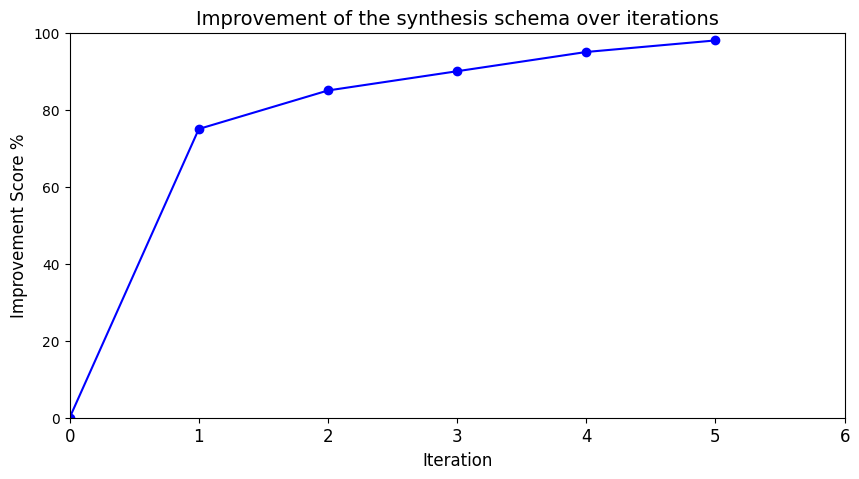

In [18]:
# Plot the improvement of the schema from the JSON file
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the JSON file
with open(output_file, "r", encoding="utf-8") as f:
    data = json.load(f)

    improvement_perc = [0]

    for i in range(1, len(data)):
        original = data[i]["improvement_score"]
        new = data[i]["improvement_score"]
        improvement_perc.append(new)

imporvement_perc = np.array(improvement_perc)
imporvement_perc

plt.figure(figsize=(10, 5))
plt.title("Improvement of the synthesis schema over iterations", fontsize=14)
plt.plot(imporvement_perc, marker='o', linestyle='-', color='b')
plt.xlabel("Iteration", fontsize=12)
plt.xticks(fontsize=12)
# set axes limits
plt.xlim(0, len(imporvement_perc))
plt.ylim(0, 100)
plt.ylabel("Improvement Score %", fontsize=12)

# Optimize challenges schema on 6 research papers (Na-Mn-O) compositions

In [23]:
import sys
from pyprojroot import here
# Add the root of the project (where `src/` lives) to sys.path
sys.path.append(str(here()))
import json
import os
import tqdm.auto as tqdm

from src.utils.optimize_extraction_schema import optimize_challenges_info_schema

import dotenv
# Load environment variables from .env file
dotenv.load_dotenv()

# Set the API keys
azure_openai_api_key = os.getenv("AZURE_OPENAI_API_KEY")
print(f"AZURE_OPENAI_API_KEY: {azure_openai_api_key[:4]}...")
if not azure_openai_api_key:
    raise ValueError("AZURE_OPENAI_API_KEY environment variable not set.")

azure_deployment = os.getenv("AZURE_MODEL_DEPLOYMENT_NAME")
azue_api_version=os.getenv("AZURE_OPENAI_API_VERSION")
azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT")

current_schema = {
    "material": "<exact formula or name as presented in the paper>",
    "stage": "<eg. synthesis, characterization, testing, post-processing, application>",
    "challenge": "<description of the specific problem the authors encountered in a concise way.>",
    "impact": "<explanation of why this problem matters — what negative effect it has.>",
    "solution": "<a summary of how the authors addressed or solved this challenge>",
    "evidence": "<Quote where in the paper this information is discussed (e.g., page numbers, figures, tables, or sections).>"
    } 


from src.utils.pymupdf_loader import PyMuPDFLoader
data_dir = here("data/papers/Na-Mn-O")
# List the pdf files in the directory
pdf_files = [f for f in os.listdir(data_dir) if f.endswith('.pdf')]
# Print the list of pdf files
print("PDF files in the directory:", pdf_files)

list_of_schemas = [current_schema]

for pdf_file in tqdm.tqdm(pdf_files):
    print(f"Processing file: {pdf_file}")
    pdf_loader = PyMuPDFLoader(data_dir)
    pdf_text = pdf_loader.load_a_pdf(pdf_file)
    print(f"Text extracted from {pdf_file}:\n{pdf_text[:500]}...")  # Print the first 500 characters of the text

    synthesis_text = '''{text}'''.format(text="\n".join(pdf_text))

    optimized_challenges_schema= optimize_challenges_info_schema(
        api_key=azure_openai_api_key,
        synthesis_text=synthesis_text,
        current_schema=current_schema,
        azure=True,
        model_name=azure_deployment,
        temp=0,
        azure_api_version=azue_api_version,
        azure_endpoint=azure_endpoint
    )

    # Debugging: Print the optimized schema
    print("Optimized challenges schema:", optimized_challenges_schema)
    print("Type of optimized_schema:", type(optimized_challenges_schema))

    # Ensure the synthesis schema is a dictionary
    if not isinstance(optimized_challenges_schema, dict):
        raise ValueError("Optimized challenges schema is not a dictionary. Check the LLM response or parsing logic.")

    # append the optimized schema to the list
    list_of_schemas.append(optimized_challenges_schema)

    # replace the current schema with the optimized one
    current_schema = optimized_challenges_schema

# Save the optimized schema to a JSON file
output_dir = here("data/papers/Na-Mn-O/optimized-schemas")
output_file = os.path.join(output_dir, "challenges_schema.json")

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Append the optimized schema to the JSON file
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(list_of_schemas, f, indent=4)

# Print the path to the saved file
print(f"Optimized challenges schema saved to {output_file}")

import pprint
pprint.pprint(f"Optimized schema saved to {output_file}")

AZURE_OPENAI_API_KEY: GEQy...
PDF files in the directory: ['000690060.pdf', '010855392.pdf', '000720518.pdf', '000720519.pdf', '010916740.pdf']


  0%|          | 0/5 [00:00<?, ?it/s]

Processing file: 000690060.pdf
Text extracted from 000690060.pdf:
P2−NaxCoyMn1−yO2 (y = 0, 0.1) as Cathode Materials in Sodium-Ion BatteriesEffects of Doping and Morphology To Enhance Cycling Stability Nicolas Bucher,∇,†,‡,§ Steffen Hartung,∇,†,‡,§ Joseph B. Franklin,∥Anna M. Wise,⊥Linda Y. Lim,⊥,# Han-Yi Chen,†,‡,§ Johanna Nelson Weker,⊥Michael F. Toney,⊥and Madhavi Srinivasan*,†,§,∥ †TUM CREATE, Singapore 138602, Singapore ‡Technical University of Munich, Garching 85748, Germany §School of Materials Science and Engineering, Nanyang Technological University,...
Optimized challenges schema: {'optimized_schema': {'material': '<exact formula or name as presented in the paper>', 'stage': '<e.g., synthesis, characterization, testing, post-processing, application>', 'challenge': {'description': '<concise description of the specific problem encountered>', 'type': '<categorization of the challenge, e.g., structural, chemical, procedural>', 'impact': '<explanation of why this problem matters 

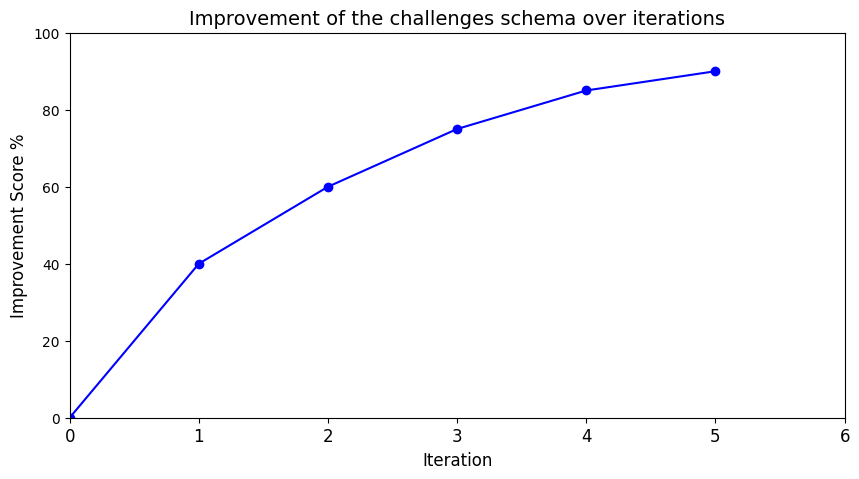

In [24]:
# Plot the improvement of the schema from the JSON file
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the JSON file
with open(output_file, "r", encoding="utf-8") as f:
    data = json.load(f)

    improvement_perc = [0]

    for i in range(1, len(data)):
        original = data[i]["improvement_score"]
        new = data[i]["improvement_score"]
        improvement_perc.append(new)

imporvement_perc = np.array(improvement_perc)
imporvement_perc

plt.figure(figsize=(10, 5))
plt.title("Improvement of the challenges schema over iterations", fontsize=14)
plt.plot(imporvement_perc, marker='o', linestyle='-', color='b')
plt.xlabel("Iteration", fontsize=12)
plt.xticks(fontsize=12)
# set axes limits
plt.xlim(0, len(imporvement_perc))
plt.ylim(0, 100)
plt.ylabel("Improvement Score %", fontsize=12)
plt.savefig("improvement_plot.png")  # Save the plot

In [25]:
import os
from neo4j import GraphDatabase
import dotenv

# Load environment variables from .env file first
dotenv.load_dotenv()

# Then get environment vars
uri = "bolt://localhost:7687"
username = "neo4j"
password = os.getenv("NEO4J_PASSWORD")

if not password:
    raise ValueError("NEO4J_PASSWORD is not set in the environment")

print(f"NEO4J_PASSWORD: {password[:4]}...")

# Connect to Neo4j
driver = GraphDatabase.driver(uri, auth=(username, password))


NEO4J_PASSWORD: Kh-2...


In [28]:
# Function to create schema in Neo4j
import os
import json
from neo4j import GraphDatabase
import dotenv

from pyprojroot import here

# Load environment variables from .env file
dotenv.load_dotenv()

# Connect to Neo4j
uri = "bolt://localhost:7687"
username = "neo4j"
password = os.getenv("NEO4J_PASSWORD")

if not password:
    raise ValueError("NEO4J_PASSWORD environment variable is not set")

print(f"Connecting to Neo4j at {uri} as user '{username}'...")

driver = GraphDatabase.driver(uri, auth=(username, password))

def create_schema(tx, schema: dict, iteration: int):
    """
    Create a Schema node and recursively add Field nodes with full path uniqueness.
    """
    tx.run("MERGE (s:Schema {iteration: $iteration})", iteration=iteration)

    def add_fields(subschema, parent=None, path_prefix=""):
        for key, value in subschema.items():
            current_path = f"{path_prefix}.{key}" if path_prefix else key

            # Create unique Field node using full path
            tx.run("""
                MERGE (f:Field {name: $name, path: $path, iteration: $iteration})
            """, name=key, path=current_path, iteration=iteration)

            # Link to Schema only if top-level
            if path_prefix == "":
                tx.run("""
                    MATCH (s:Schema {iteration: $iteration})
                    MATCH (f:Field {path: $path, iteration: $iteration})
                    MERGE (s)-[:HAS_FIELD]->(f)
                """, path=current_path, iteration=iteration)

            # Link parent → child
            if parent:
                tx.run("""
                    MATCH (p:Field {path: $parent_path, iteration: $iteration})
                    MATCH (c:Field {path: $child_path, iteration: $iteration})
                    MERGE (p)-[:HAS_CHILD]->(c)
                """, parent_path=path_prefix, child_path=current_path, iteration=iteration)

            # Recurse
            if isinstance(value, dict):
                add_fields(value, parent=current_path, path_prefix=current_path)
            else:
                tx.run("""
                    MATCH (f:Field {path: $path, iteration: $iteration})
                    SET f.value = $value
                """, path=current_path, value=value, iteration=iteration)

    add_fields(schema)


# Path to the JSON file
output_file = str(here("data/papers/Na-Mn-O/optimized-schemas/challenges_schema.json"))

# Check if the file exists
if not os.path.exists(output_file):
    raise FileNotFoundError(f"File {output_file} does not exist.")
else:
    print(f"File {output_file} exists.")

# Load the JSON file
with open(output_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# Load schemas into Neo4j
with driver.session() as session:
    for i, item in enumerate(data):
        # Skip the first item if it doesn't have an optimized schema
        if i == 0:
            session.execute_write(create_schema, item, i)
        else:
            # Extract the optimized schema
            schema = item.get("optimized_schema")
            if schema:
                session.execute_write(create_schema, schema, i)
                print(f"Loaded schema {i}")
            else:
                print(f"Skipped schema {i}: no 'optimized_schema' found")


Connecting to Neo4j at bolt://localhost:7687 as user 'neo4j'...
File /Users/arashkhajeh/GitHub/LLM-for-Materials/data/papers/Na-Mn-O/optimized-schemas/challenges_schema.json exists.
Loaded schema 1
Loaded schema 2
Loaded schema 3
Loaded schema 4
Loaded schema 5


# Adding Graphs for Synthesis Schema

In [29]:
# Function to create schema in Neo4j
import os
import json
from neo4j import GraphDatabase
import dotenv

from pyprojroot import here

# Load environment variables from .env file
dotenv.load_dotenv()

# Connect to Neo4j
uri = "bolt://localhost:7687"
username = "neo4j"
password = os.getenv("NEO4J_PASSWORD")

if not password:
    raise ValueError("NEO4J_PASSWORD environment variable is not set")

print(f"Connecting to Neo4j at {uri} as user '{username}'...")

driver = GraphDatabase.driver(uri, auth=(username, password))

def create_schema(tx, schema: dict, iteration: int):
    tx.run("MERGE (s:Schema {iteration: $iteration})", iteration=iteration)

    def add_fields(subschema, parent_path=None, path_prefix=""):
        for key, value in subschema.items():
            current_path = f"{path_prefix}.{key}" if path_prefix else key

            # Create this Field node
            tx.run("""
                MERGE (f:Field {name: $name, path: $path, iteration: $iteration})
            """, name=key, path=current_path, iteration=iteration)

            if path_prefix == "":
                tx.run("""
                    MATCH (s:Schema {iteration: $iteration})
                    MATCH (f:Field {path: $path, iteration: $iteration})
                    MERGE (s)-[:HAS_FIELD]->(f)
                """, path=current_path, iteration=iteration)

            if parent_path:
                tx.run("""
                    MATCH (p:Field {path: $parent_path, iteration: $iteration})
                    MATCH (c:Field {path: $child_path, iteration: $iteration})
                    MERGE (p)-[:HAS_CHILD]->(c)
                """, parent_path=parent_path, child_path=current_path, iteration=iteration)

            # Handle nested structures
            if isinstance(value, dict):
                add_fields(value, parent_path=current_path, path_prefix=current_path)

            elif isinstance(value, list):
                if all(isinstance(item, dict) for item in value):
                    for idx, item in enumerate(value):
                        list_path = f"{current_path}[{idx}]"
                        tx.run("""
                            MERGE (f:Field {name: $name, path: $path, iteration: $iteration})
                        """, name=f"{key}[{idx}]", path=list_path, iteration=iteration)
                        tx.run("""
                            MATCH (p:Field {path: $parent_path, iteration: $iteration})
                            MATCH (c:Field {path: $child_path, iteration: $iteration})
                            MERGE (p)-[:HAS_CHILD]->(c)
                        """, parent_path=current_path, child_path=list_path, iteration=iteration)
                        add_fields(item, parent_path=list_path, path_prefix=list_path)
                elif all(isinstance(item, (str, int, float, bool, type(None))) for item in value):
                    tx.run("""
                        MATCH (f:Field {path: $path, iteration: $iteration})
                        SET f.value = $value
                    """, path=current_path, value=value, iteration=iteration)
                else:
                    print(f"⚠️ Skipping list at {current_path}: unsupported item types")
            elif isinstance(value, (str, int, float, bool)) or value is None:
                tx.run("""
                    MATCH (f:Field {path: $path, iteration: $iteration})
                    SET f.value = $value
                """, path=current_path, value=value, iteration=iteration)
            else:
                print(f"⚠️ Skipping unsupported value at {current_path}: {type(value)}")

    add_fields(schema)

# Path to the JSON file
output_file = str(here("data/papers/Na-Mn-O/optimized-schemas/synthesis_schema.json"))

# Check if the file exists
if not os.path.exists(output_file):
    raise FileNotFoundError(f"File {output_file} does not exist.")
else:
    print(f"File {output_file} exists.")

# Load the JSON file
with open(output_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# Load schemas into Neo4j
with driver.session() as session:
    for i, item in enumerate(data):
        # Skip the first item if it doesn't have an optimized schema
        if i == 0:
            session.execute_write(create_schema, item, i)
            print(f"Loaded schema {i}")
        else: 
            # Extract the optimized schema
            schema = item.get("optimized_schema")
            if schema:
                session.execute_write(create_schema, schema, i)
                print(f"Loaded schema {i}")
            else:
                print(f"Skipped schema {i}: no 'optimized_schema' found")


Connecting to Neo4j at bolt://localhost:7687 as user 'neo4j'...
File /Users/arashkhajeh/GitHub/LLM-for-Materials/data/papers/Na-Mn-O/optimized-schemas/synthesis_schema.json exists.
Loaded schema 0
Loaded schema 1
Loaded schema 2
Loaded schema 3
Loaded schema 4
Loaded schema 5
